Aaron Morgan

CONCLUSIONS:
-Cities located closer to the equator tend to have a higher max temperature
-Cities closer to the equator tend to have humidity levels that start above 50% which is a higher starting humidity than the cities above and below the equator
-According to my chart, the wind speed tends to be lower at the equator compared to the other latitudes on the earth

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../cities.csv"

# output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
# Calling API and setting the temperature setting to imperial for fahrenheit
temp = "imperial"
api_call = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp}&q="


# Creating the list for the DataFrames
lats = []
lngs= []
updated_record_count = []
cloudiness = []
dates = []
humidities = []
max_temps = []
wind_speeds = []
countries = []


# Setting the counts for looping
record_count = 0
set_count = 1


# Looping through the API to retrieve the data for the DataFrames with Try and Except rule
for city in cities:
    try:
        response = requests.get(api_call + city.replace(" ", "&")).json()
        lats.append(response["coord"]["lat"])
        lngs.append(response["coord"]["lon"])
        cloudiness.append(response["clouds"]["all"])
        countries.append(response["sys"]["country"])
        dates.append(response["dt"])
        humidities.append(response["main"]["humidity"])
        max_temps.append(response["main"]["temp_max"])
        wind_speeds.append(response["wind"]["speed"])
        # Creating Record counts of no more than 50 a piece
        if record_count > 50:
            record_count = 1
            set_count += 1
            updated_record_count.append(city)
        else:
            record_count += 1
            updated_record_count.append(city)
        # Figured out how to make these Print statements by looking at the example provided
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
    except:
        print("City not found. Skipping to next...")
print("------------------------------------------\nCOMPLETE\n------------------------------------------")

Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | luderitz
City not found. Skipping to next...
Processing Record 3 of Set 1 | flin flon
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | champerico
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | turhal
Processing Record 9 of Set 1 | storforshei
Processing Record 10 of Set 1 | ponta do sol
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | kruisfontein
Processing Record 15 of Set 1 | hargeysa
Processing Record 16 of Set 1 | provideniya
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | manhush
Processing Record 19 of Set 1 | punta arenas
City not found. Skipping to next...
Processing Record 20 of Set 1 | ketchikan
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | busselton
City not found.

Processing Record 23 of Set 4 | laguna
City not found. Skipping to next...
Processing Record 24 of Set 4 | nanortalik
Processing Record 25 of Set 4 | brownwood
City not found. Skipping to next...
Processing Record 26 of Set 4 | aykhal
Processing Record 27 of Set 4 | longyearbyen
Processing Record 28 of Set 4 | omboue
Processing Record 29 of Set 4 | appenzell
Processing Record 30 of Set 4 | ahipara
Processing Record 31 of Set 4 | honiara
Processing Record 32 of Set 4 | dingle
City not found. Skipping to next...
City not found. Skipping to next...
Processing Record 33 of Set 4 | rochefort
Processing Record 34 of Set 4 | alice springs
Processing Record 35 of Set 4 | lavrentiya
Processing Record 36 of Set 4 | dubbo
Processing Record 37 of Set 4 | kamenka
Processing Record 38 of Set 4 | port-gentil
City not found. Skipping to next...
Processing Record 39 of Set 4 | carbonia
Processing Record 40 of Set 4 | tutoia
Processing Record 41 of Set 4 | miri
Processing Record 42 of Set 4 | hasaki
Pro

Processing Record 48 of Set 7 | mount gambier
Processing Record 49 of Set 7 | aripuana
Processing Record 50 of Set 7 | niamey
Processing Record 51 of Set 7 | tepic
Processing Record 1 of Set 8 | nizwa
City not found. Skipping to next...
Processing Record 2 of Set 8 | guerrero negro
Processing Record 3 of Set 8 | maldonado
Processing Record 4 of Set 8 | port blair
City not found. Skipping to next...
Processing Record 5 of Set 8 | comodoro rivadavia
Processing Record 6 of Set 8 | viesca
Processing Record 7 of Set 8 | albolote
Processing Record 8 of Set 8 | tavda
Processing Record 9 of Set 8 | ville-marie
City not found. Skipping to next...
Processing Record 10 of Set 8 | alvorada
City not found. Skipping to next...
City not found. Skipping to next...
Processing Record 11 of Set 8 | salinopolis
City not found. Skipping to next...
Processing Record 12 of Set 8 | wainwright
Processing Record 13 of Set 8 | saldanha
Processing Record 14 of Set 8 | haines junction
Processing Record 15 of Set 8

Processing Record 18 of Set 11 | steamboat springs
Processing Record 19 of Set 11 | alipur duar
Processing Record 20 of Set 11 | kijini
Processing Record 21 of Set 11 | ubala
Processing Record 22 of Set 11 | luebo
Processing Record 23 of Set 11 | tripoli
Processing Record 24 of Set 11 | tumkur
Processing Record 25 of Set 11 | nizhniy chir
Processing Record 26 of Set 11 | mackay
Processing Record 27 of Set 11 | petropavlovsk-kamchatskiy
Processing Record 28 of Set 11 | sierra vista
Processing Record 29 of Set 11 | brenes
Processing Record 30 of Set 11 | bonfim
Processing Record 31 of Set 11 | tazovskiy
Processing Record 32 of Set 11 | dudinka
------------------------------------------
COMPLETE
------------------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
# Making a dictionary
weather_info_dict = {
    "City" : updated_record_count,
    "Lat" : lats,
    "Lng" : lngs,
    "Cloudiness" : cloudiness,
    "Country" : countries,
    "Date" : dates,
    "Humidity" : humidities,
    "Max Temp" : max_temps,
    "Wind Speed" : wind_speeds
}

In [18]:
# Creating a DataFrame using the dictionary
weather_info_df = pd.DataFrame(weather_info_dict)
weather_info_df.head()

,City,Lat,Lng,Cloudiness,Country,Date,Humidity,Max Temp,Wind Speed
0,yellowknife,62.45,-114.38,75,CA,1570032341,80,41.00,6.93
1,luderitz,-26.65,15.16,0,NA,1570032367,68,68.00,25.28
2,flin flon,48.50,6.66,0,FR,1570032469,50,57.20,12.75
3,butaritari,3.07,172.79,80,KI,1570032291,65,84.62,6.60
4,hermanus,-34.42,19.24,100,ZA,1570032312,87,63.00,3.00


In [19]:
# Save DataFrame to CSV
weather_info_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

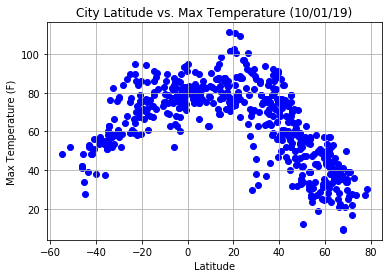

In [31]:
# Creating plot for Latitude versus Temperature
plt.scatter(weather_info_df["Lat"], weather_info_df["Max Temp"], facecolors="blue")
plt.grid (True)
plt.title("City Latitude vs. Max Temperature (10/01/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("Latitude_versus_MaxTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

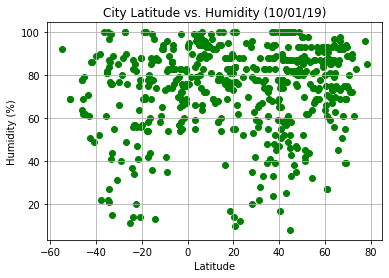

In [32]:
# Creating plot for Latitude versus Humidity
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolors="green")
plt.grid (True)
plt.title("City Latitude vs. Humidity (10/01/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Latitude_versus_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

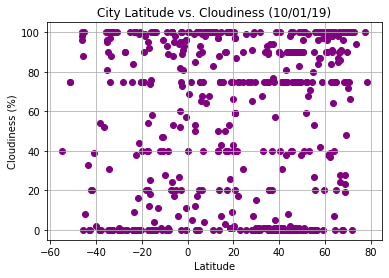

In [33]:
# Creating plot for Latitude versus Cloudiness
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolors="purple")
plt.grid (True)
plt.title("City Latitude vs. Cloudiness (10/01/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Latitude_versus_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

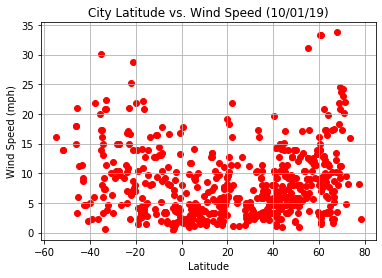

In [34]:
# Creating plot for Latitude versus Wind Speed
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolors="red")
plt.grid (True)
plt.title("City Latitude vs. Wind Speed (10/01/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Latitude_versus_WindSpeed.png")
plt.show()